# Normal distribution tests
> Using a range of normal distribution test functions

- toc: false
- badges: true
- comments: true
- author: Cleber Jorge Amaral
- categories: [comparison, jupyter]
- image: images/normal-distribution-tests.png

In [3]:
#hide
from scipy import stats
def dp(data,alpha):
    #This function tests the null hypothesis that a sample comes from a normal distribution.
    dp_statistic, dpp_value = stats.normaltest(data)
    if dpp_value > alpha:
        print("It is a normal distribution - D'Agostino and Pearson's (DP) test (",round(dpp_value,3),">",alpha,").")
        return True
    else:
        print("It is NOT a normal distribution - D'Agostino and Pearson's (DP) test (",round(dpp_value,3),"NOT >",alpha,").")
        return False

In [4]:
#hide
from statsmodels.stats.diagnostic import lilliefors
def l(data,alpha):
    l_statistic, lp_value = lilliefors(data, pvalmethod="approx")
    if lp_value > alpha:
        print("It is a normal distribution - Lilliefors test (",round(lp_value,3),">",alpha,").")
        return True
    else:
        print("It is NOT a normal distribution - Lilliefors test (",round(lp_value,3),"NOT >",alpha,").")
        return False

In [13]:
#hide
from scipy import stats
def sw(data,alpha):
    sw_statistic, shp_value = stats.shapiro(data)
    if shp_value > alpha:
        print("It is a normal distribution - Shapiro-Wilk (SW) test (",round(shp_value,3),">",alpha,").")
        return True
    else:
        print("It is NOT a normal distribution - Shapiro-Wilk (SW) test (",round(shp_value,3),"NOT >",alpha,").")
        return False

In [14]:
#hide
from scipy import stats
def ad(data,alpha):
    s, c, i = stats.anderson(data,'norm')
    if (np.where(i == alpha*100)[0]):
        if c[np.where(i == alpha*100)[0][0]] > s:
            print("It is a normal distribution - Anderson-Darling (AD) test (",round(c[np.where(i == alpha*100)[0][0]],3),">",round(s,3),").")
            return True
        else:
            print("It is NOT a normal distribution - Anderson-Darling (AD) test (",round(c[np.where(i == alpha*100)[0][0]],3),"NOT >",round(s,3),").")
            return False
    else:
        print("Given alpha =",alpha,"(",alpha*100,"% ) is not supported by Anderson-Darling, use",i,"instead.")

## Tests on a true normal distribution
> Using the tests in a normal distribution in which it is expected to get **true** from results. Notice that since the data is randomly generated **false-negative** results may happen.

In [15]:
#hide
from scipy.stats import norm
import numpy as np
mu, sigma = 1, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

### Visual check using histogram

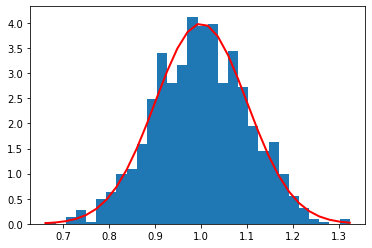

In [16]:
#hide_input
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data, density=True, bins=30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

### Visual check using boxplot

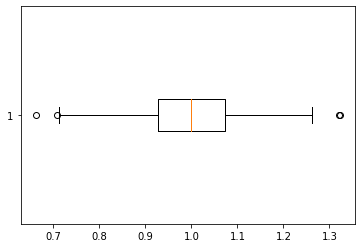

In [17]:
#hide_input
import matplotlib.pyplot as plt
plt.boxplot(data, vert=False)
plt.show()

### Visual check using quantile-quantile plot (Q-Q Plot)

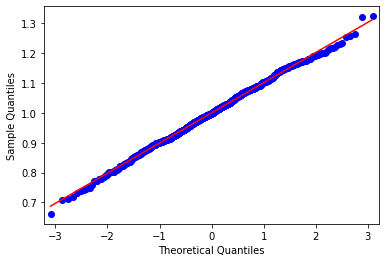

In [18]:
#hide_input
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
plt.show()

### Statitistical normality check

In [19]:
#hide_input
alpha = 0.05
tests = []
tests.append(dp(data,alpha))
tests.append(l(data,alpha))
tests.append(sw(data,alpha))
tests.append(ad(data,alpha))
print("\n",tests.count(True),"in",len(tests),"tests says it is likely to be a normal distribution ( alpha =",alpha,")")

It is a normal distribution - D'Agostino and Pearson's (DP) test ( 0.593 > 0.05 ).
It is a normal distribution - Lilliefors test ( 0.42 > 0.05 ).
It is a normal distribution - Shapiro-Wilk (SW) test ( 0.484 > 0.05 ).
It is a normal distribution - Anderson-Darling (AD) test ( 0.784 > 0.401 ).

 4 in 4 tests says it is likely to be a normal distribution ( alpha = 0.05 )


## Testing an approximate normal distribution
> This next distribution is closelly normal. In order to get less **false-negative** results alpha value is being set to a lower value.

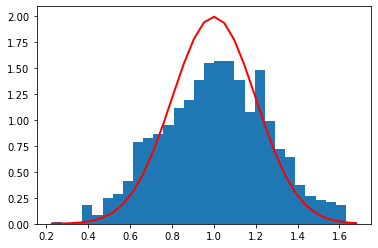

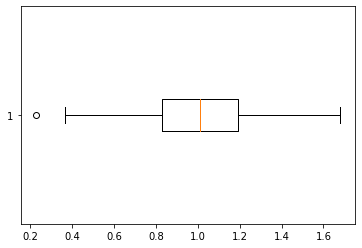

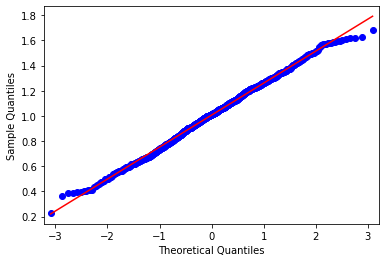

It is NOT a normal distribution - D'Agostino and Pearson's (DP) test ( 0.029 NOT > 0.05 ).
It is a normal distribution - Lilliefors test ( 0.436 > 0.05 ).
It is NOT a normal distribution - Shapiro-Wilk (SW) test ( 0.042 NOT > 0.05 ).
It is a normal distribution - Anderson-Darling (AD) test ( 0.784 > 0.613 ).

 2 in 4 tests says it is likely to be a normal distribution ( alpha = 0.05 )


In [20]:
#hide_input
from scipy.stats import norm
import numpy as np
mu, sigma = 1, 0.2 # mean and standard deviation
data_a = np.random.normal(mu - 0.15, sigma, size=500)
data_b = np.random.normal(mu + 0.15, sigma, size=500)
data = np.concatenate((data_a, data_b))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data, density=True, bins=30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

plt.boxplot(data, vert=False)
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
plt.show()

alpha = 0.05
tests = []
tests.append(dp(data,alpha))
tests.append(l(data,alpha))
tests.append(sw(data,alpha))
tests.append(ad(data,alpha))
print("\n",tests.count(True),"in",len(tests),"tests says it is likely to be a normal distribution ( alpha =",alpha,")")

## Testing against an exponential distribution
> This next distribution is not normal at all, no **true** results are expected

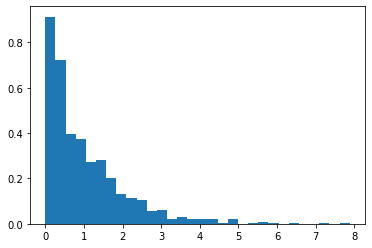

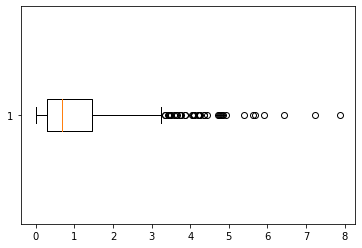

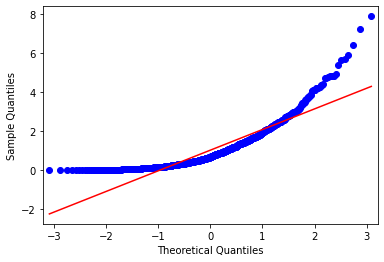

It is NOT a normal distribution - D'Agostino and Pearson's (DP) test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Lilliefors test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Shapiro-Wilk (SW) test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Anderson-Darling (AD) test ( 0.784 NOT > 47.222 ).

 0 in 4 tests says it is likely to be a normal distribution ( alpha = 0.05 )


In [21]:
#hide_input
from scipy.stats import norm
import numpy as np
data = np.random.exponential(size=1000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data, density=True, bins=30)
plt.show()

plt.boxplot(data, vert=False)
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
plt.show()

alpha = 0.05
tests = []
tests.append(dp(data,alpha))
tests.append(l(data,alpha))
tests.append(sw(data,alpha))
tests.append(ad(data,alpha))
print("\n",tests.count(True),"in",len(tests),"tests says it is likely to be a normal distribution ( alpha =",alpha,")")

## Testing against an random chisquare distribution with 5 degrees of freedom
> This next distribution is not normal at all, no **true** results are expected

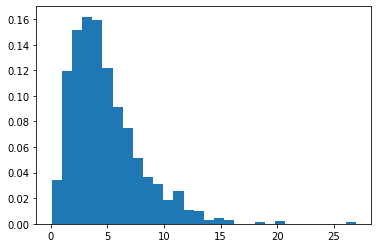

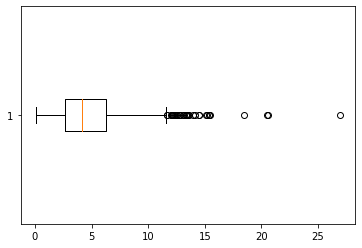

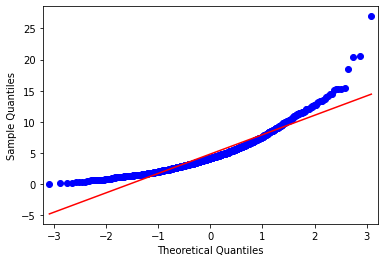

It is NOT a normal distribution - D'Agostino and Pearson's (DP) test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Lilliefors test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Shapiro-Wilk (SW) test ( 0.0 NOT > 0.05 ).
It is NOT a normal distribution - Anderson-Darling (AD) test ( 0.784 NOT > 22.743 ).

 0 in 4 tests says it is likely to be a normal distribution ( alpha = 0.05 )


In [22]:
#hide_input
from scipy.stats import norm
import numpy as np
data = np.random.chisquare(5,1000)

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(data, density=True, bins=30)
plt.show()

plt.boxplot(data, vert=False)
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
plt.show()

alpha = 0.05
tests = []
tests.append(dp(data,alpha))
tests.append(l(data,alpha))
tests.append(sw(data,alpha))
tests.append(ad(data,alpha))
print("\n",tests.count(True),"in",len(tests),"tests says it is likely to be a normal distribution ( alpha =",alpha,")")


Developed by [Cleber Jorge Amaral](https://cleberjamaral.github.io/).

Sources:
* [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
* [D'Agostino and Pearson's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
* [Lilliefors' test](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html)
* [Anderson-Darling test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)
* [Random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
* [Random exponential](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.exponential.html)
* [Random chisquare](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.chisquare.html)